# Data Cleansing with SQL on Google Big Query

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Entity Relationship Diagram
![Entity Relationship Diagram](https://github.com/juan-esteban-berger/Options_Pricing_with_Neural_Networks_and_Gradient_Boosters/blob/main/images/Entity_Relationship_Diagram.jpg?raw=true)


## Join Options_Info and Options_Prices Tables

In [ ]:
%%bigquery
# Preview Options_Info
SELECT * FROM `acms80695-384817.Options_Dataset.Options_Info` LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,secid,date,exdate,cp_flag,strike_price,impl_volatility,optionid,index_flag,issuer,div_convention,exercise_style
0,101647,2009-11-27,2010-07-17,C,6000,0.967060,46405890,0,ARENA PHARMACEUTICALS INC,None,A
1,101647,2009-11-27,2010-07-17,C,7000,0.937626,46724269,0,ARENA PHARMACEUTICALS INC,None,A
2,101647,2009-11-27,2010-07-17,C,3000,0.888191,46517898,0,ARENA PHARMACEUTICALS INC,None,A
3,101647,2009-11-27,2010-07-17,C,4000,0.839475,45400599,0,ARENA PHARMACEUTICALS INC,None,A
4,101647,2009-11-27,2010-07-17,C,1000,0.994055,46654492,0,ARENA PHARMACEUTICALS INC,None,A


In [ ]:
%%bigquery
# Preview Options_Prices
SELECT * FROM `acms80695-384817.Options_Dataset.Options_Prices` LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,date,exdate,cp_flag,best_bid,best_offer,optionid,am_settlement,index_flag,issuer,exercise_style
0,2009-12-21,2010-08-21,C,3.00,3.60,45373285,0,0,INFOGROUP INC,A
1,2009-12-21,2010-08-21,C,0.70,1.10,46718441,0,0,INFOGROUP INC,A
2,2009-12-21,2010-08-21,C,1.55,2.10,46359818,0,0,INFOGROUP INC,A
3,2009-12-22,2010-08-21,C,3.00,3.80,45373285,0,0,INFOGROUP INC,A
4,2009-12-22,2010-08-21,C,0.70,1.15,46718441,0,0,INFOGROUP INC,A


In [ ]:
%%bigquery
# Join the Options_Info and Options_Prices Tables
CREATE VIEW `acms80695-384817.Options_Dataset.Options_Info_Prices` AS
SELECT
t1.*,
t2.best_bid, t2.best_offer, t2.am_settlement
FROM `acms80695-384817.Options_Dataset.Options_Info` AS t1
JOIN `acms80695-384817.Options_Dataset.Options_Prices` AS t2
ON t1.optionid = t2.optionid AND t1.date = t2.date

Query is running:   0%|          |

""


In [ ]:
%%bigquery
# Preview Options_Info_Prices
SELECT * FROM `acms80695-384817.Options_Dataset.Options_Info_Prices` LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,secid,date,exdate,cp_flag,strike_price,impl_volatility,optionid,index_flag,issuer,div_convention,exercise_style,best_bid,best_offer,am_settlement
0,212668,2021-01-26,2021-02-19,P,50000,0.482925,134694465,0,PAGSEGURO DIGITAL LTD,None,A,1.70,1.95,0
1,212676,2021-02-18,2021-02-19,P,2500,NaN,137482193,0,PLAYAGS INC,None,A,0.00,0.05,0
2,212790,2021-01-14,2021-02-19,P,115000,1.164223,134732059,0,ZSCALER INC,None,A,0.05,2.29,0
3,212790,2021-02-02,2021-02-19,P,232500,0.559091,138139021,0,ZSCALER INC,None,A,19.95,21.00,0
4,106969,2021-10-28,2021-11-05,C,71000,0.349198,142687845,0,BATH & BODY WORKS INC,None,A,0.70,0.78,0


## Join the Security_Prices and Zero_Coupon_Yield_Curve Tables

In [ ]:
%%bigquery
# Preview Security_Prices
SELECT * FROM `acms80695-384817.Options_Dataset.Security_Prices` LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,secid,date,cusip,ticker,sic,index_flag,exchange_d,class,issue_type,industry_group,low,high,open,close,volume,return,cfadj,shrout,cfret
0,110286,1996-10-15,00037T10,AAPJ,<NA>,0,16,None,0,<NA>,3.125000000,3.375000000,3.375000000,3.125000000,6400.000000000,-0.043061000,1,3504,1
1,110286,1997-02-26,00037T10,AAPJ,<NA>,0,16,None,0,<NA>,2.750000000,3.000000000,3.000000000,3.000000000,14300.000000000,0E-9,1,3492,1
2,110286,1998-05-13,00037T10,AAPJ,<NA>,0,16,None,0,<NA>,0.375000000,0.500000000,0.500000000,0.375000000,46600.000000000,-0.142857000,1,8304,1
3,110286,1998-11-13,00037T10,AAPJ,<NA>,0,16,None,0,<NA>,0.281250000,0.281250000,0.281250000,0.281250000,2000.000000000,-0.181818000,0.25,2076,0.25
4,110286,1997-07-29,00037T10,AAPJ,<NA>,0,16,None,0,<NA>,2.375000000,2.375000000,2.375000000,2.375000000,200.000000000,-0.095238000,1,3500,1


In [ ]:
%%bigquery
# Preview Zero_Coupon_Yield_Curve
SELECT * FROM `acms80695-384817.Options_Dataset.Zero_Coupon_Yield_Curve` LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,date,days,rate
0,2020-04-02,256,0.558797
1,2020-07-02,256,0.282671
2,2020-10-01,256,0.209547
3,2020-12-31,256,0.169495
4,2021-04-01,256,0.181553


In [ ]:
%%bigquery
# Join the Security_Prices and Zero_Coupon_Yield_Curve Tables
CREATE VIEW `acms80695-384817.Options_Dataset.Security_Rate` AS
SELECT t1.secid, t1.`date`, t1.ticker, t1.industry_group, t1.close AS under_price,
       AVG(t1.return) AS return,
       COALESCE(AVG(t2.rate), 0) AS zero_coupon
FROM `acms80695-384817.Options_Dataset.Security_Prices` AS t1
LEFT JOIN `acms80695-384817.Options_Dataset.Zero_Coupon_Yield_Curve` AS t2
    ON t1.`date` = t2.`date`
WHERE t1.index_flag = 1
GROUP BY t1.`date`, t1.secid, t1.ticker, t1.industry_group, t1.close


Query is running:   0%|          |

""


In [ ]:
%%bigquery
# Preview Security_and_Rate
SELECT * FROM `acms80695-384817.Options_Dataset.Security_Rate` LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,secid,date,ticker,industry_group,under_price,return,zero_coupon
0,100003,2001-02-08,XAM2,<NA>,-388.000000000,0E-9,5.661053
1,100003,2004-07-13,XAM2,<NA>,-427.000000000,-0.102941000,3.724076
2,100009,2006-08-18,DOW2,<NA>,-279522.900000000,0.151050000,5.323272
3,100016,2001-03-14,NYA6,<NA>,-9084.170000000,0.160549000,5.359185
4,100110,2001-04-02,US25,<NA>,-0.529000000,0.001894000,5.331782


## Join the Security_Rate and Index_Dividend_Yield Tables

In [ ]:
%%bigquery
# Preview Index_Dividend_Yield
SELECT * FROM `acms80695-384817.Options_Dataset.Index_Dividend_Yield` LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,secid,date,cusip,ticker,sic,index_flag,exchange_d,class,issue_type,industry_group,rate
0,100910,1996-01-09,00168D10,ZZZZ,9999,1,0,None,A,None,4.709331
1,100910,1996-01-15,00168D10,ZZZZ,9999,1,0,None,A,None,6.106868
2,100910,1996-01-16,00168D10,ZZZZ,9999,1,0,None,A,None,5.325938
3,100910,1996-01-17,00168D10,ZZZZ,9999,1,0,None,A,None,2.828713
4,100910,1996-01-18,00168D10,ZZZZ,9999,1,0,None,A,None,3.408793


In [ ]:
%%bigquery
# Join the Security_Rate and Index_Dividend_Yield Tables
CREATE VIEW `acms80695-384817.Options_Dataset.Security_Rate_Div` AS
SELECT
t1.*,
t2.rate AS div_yield
FROM `Options_Dataset.Security_Rate` as t1
LEFT JOIN `Options_Dataset.Index_Dividend_Yield` as t2
ON t1.secid = t2.secid AND t1.date = t2.date

Query is running:   0%|          |

""


In [ ]:
%%bigquery
# Preview Security_Rate_Div
SELECT * FROM `acms80695-384817.Options_Dataset.Security_Rate_Div` LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,secid,date,ticker,industry_group,under_price,return,zero_coupon,div_yield
0,100004,2005-06-10,XAM3,<NA>,-101.000000000,0E-9,4.097479,NaN
1,100005,2006-02-23,NYA1,<NA>,-1431.000000000,-0.365972000,5.060336,NaN
2,100016,2003-04-22,NYA6,<NA>,-5712.838000000,0.024219000,3.008841,NaN
3,100057,2001-12-26,ZZZZ,<NA>,-2.180000000,0.004608000,4.646277,NaN
4,100120,2002-12-12,ZZZZ,<NA>,214.090000000,0.004269000,3.111416,NaN


## Filter Options_Info_Prices

In [ ]:
%%bigquery
# Filter Options_Info_Prices
# Only inlcude:
# - Options with a European Exercise Style
# - Option that expire at the market close of the last trading day (not early settlement)
# - Options whose Underlying Asset is an Index
# - Options whose underlying asset pays a continuous implied dividend yield

CREATE VIEW `acms80695-384817.Options_Dataset.Options_Indexes` AS
SELECT secid, `date`, exdate, cp_flag, strike_price, impl_volatility,
       best_bid, best_offer
FROM   `acms80695-384817.Options_Dataset.Options_Info_Prices`
WHERE  index_flag = 1 AND exercise_style = 'E' AND div_convention = 'I'
       AND  am_settlement = 0

Query is running:   0%|          |

""


In [ ]:
%%bigquery
# Preview Options_Indexes
SELECT * FROM `acms80695-384817.Options_Dataset.Options_Indexes` LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,secid,date,exdate,cp_flag,strike_price,impl_volatility,best_bid,best_offer
0,112878,2021-09-17,2023-12-15,P,1960000,0.199542,217.5,240.0
1,112878,2021-11-09,2023-12-15,P,2100000,0.194777,218.0,242.0
2,102480,2018-12-11,2019-01-11,C,5400000,0.409200,1313.1,1326.8
3,102434,2021-10-25,2022-09-30,P,2400000,0.211423,238.0,262.0
4,102434,2021-12-17,2022-09-30,P,2170000,0.251260,186.5,202.5


## Join Options_Indexes with Security_Rate_Div

In [ ]:
%%bigquery
# Join Options_Indexes with Security_Rate_Div
# - The GROUP BY clause groups the result set by secid, date, strike_price, and cp_flag. The MAX aggregate
#   function is then applied within each group for the remaining fields. For each combination of secid,
#   date, strike_price, and cp_flag, the query selects the row with the maximum (latest) value of exdate,
#   impl_volatility, best_bid, best_offer, under_price, zero_coupon, and div_yield.
CREATE VIEW `acms80695-384817.Options_Dataset.Options_Security` AS
SELECT
  t1.secid,
  t1.date,
  t1.strike_price,
  t1.cp_flag,
  MAX(t1.exdate) AS exdate,
  MAX(t1.impl_volatility) AS impl_volatility,
  MAX(t1.best_bid) AS best_bid,
  MAX(t1.best_offer) AS best_offer,
  MAX(t2.under_price) AS under_price,
  MAX(t2.zero_coupon) AS zero_coupon,
  MAX(t2.div_yield) AS div_yield
FROM
  `acms80695-384817.Options_Dataset.Options_Indexes` AS t1
LEFT JOIN
  `acms80695-384817.Options_Dataset.Security_Rate_Div` AS t2
ON
  t1.secid = t2.secid AND t1.date = t2.date
GROUP BY
  t1.secid, t1.date, t1.strike_price, t1.cp_flag

Query is running:   0%|          |

""


In [ ]:
%%bigquery
# Preview Options_Security
SELECT * FROM `acms80695-384817.Options_Dataset.Options_Security` LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,secid,date,strike_price,cp_flag,exdate,impl_volatility,best_bid,best_offer,under_price,zero_coupon,div_yield
0,102480,2020-07-27,9775000,P,2020-09-04,0.452714,146.3,149.0,10674.380000000,0.351734,0.830924
1,188874,2019-08-21,955000,C,2019-12-20,0.194225,56.4,62.2,983.140000000,1.595574,1.379571
2,100936,2006-12-21,250000,C,2007-12-22,0.523276,97.5,100.5,327.550000000,5.052379,1.726047
3,112878,2014-10-22,850000,P,2015-12-19,0.193258,63.4,66.0,857.280000000,1.385238,2.240892
4,150513,2016-06-10,1450000,C,2018-12-21,0.479303,643.0,651.7,2096.070000000,1.103956,2.309001


# Feature Engineering

In [ ]:
%%bigquery
# Feature Engineering
# - Calculate the midpoint price as the average between the bid and ask prices
# - Creating a new binary column "opt_type" that identifies whether the option is a call or put
# - Calculate the time to expiration in years from the difference between the expiration date (exdate) and the date
CREATE VIEW `acms80695-384817.Options_Dataset.Options_Features` AS
SELECT
  secid,
  `date`,
  strike_price,
  impl_volatility,
  under_price,
  zero_coupon,
  div_yield,
  (best_bid + best_offer)/2 AS midpoint,
  CASE
    WHEN cp_flag = 'C' THEN 1
    ELSE 0
  END AS opt_type,
  DATE_DIFF(TIMESTAMP(exdate), TIMESTAMP(`date`), DAY)/365.25 AS time
FROM
  `acms80695-384817.Options_Dataset.Options_Security`

Query is running:   0%|          |

""


In [ ]:
%%bigquery
# Preview Options_Features
SELECT * FROM `acms80695-384817.Options_Dataset.Options_Features` LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,secid,date,strike_price,impl_volatility,under_price,zero_coupon,div_yield,midpoint,opt_type,time
0,108105,2018-08-08,3050000,0.293748,2857.700000000,2.853480,1.812379,53.700,1,0.887064
1,116026,2011-08-01,95000,0.326549,100.180000000,1.465541,0.000000,7.500,0,0.626968
2,115464,2021-08-16,2230000,0.270288,2362.760000000,0.718279,2.024226,102.600,0,0.835044
3,112878,2019-07-31,1355000,0.123277,1317.090000000,1.960606,2.351313,62.550,0,0.388775
4,189691,2019-09-16,285000,0.307065,299.800000000,1.771198,1.887187,16.925,0,1.256674


## Calculate the Price Lags for the Past 20 Trading Days

In [ ]:
%%bigquery
# Calculate the Price Lags for the Past 20 Trading Days
CREATE VIEW `acms80695-384817.Options_Dataset.Price_Lags` AS
SELECT
  secid,
  `date`,
  under_price,
  LAG(under_price, 1) OVER (PARTITION BY secid ORDER BY date) AS under_lag1,
  LAG(under_price, 2) OVER (PARTITION BY secid ORDER BY date) AS under_lag2,
  LAG(under_price, 3) OVER (PARTITION BY secid ORDER BY date) AS under_lag3,
  LAG(under_price, 4) OVER (PARTITION BY secid ORDER BY date) AS under_lag4,
  LAG(under_price, 5) OVER (PARTITION BY secid ORDER BY date) AS under_lag5,
  LAG(under_price, 6) OVER (PARTITION BY secid ORDER BY date) AS under_lag6,
  LAG(under_price, 7) OVER (PARTITION BY secid ORDER BY date) AS under_lag7,
  LAG(under_price, 8) OVER (PARTITION BY secid ORDER BY date) AS under_lag8,
  LAG(under_price, 9) OVER (PARTITION BY secid ORDER BY date) AS under_lag9,
  LAG(under_price, 10) OVER (PARTITION BY secid ORDER BY date) AS under_lag10,
  LAG(under_price, 11) OVER (PARTITION BY secid ORDER BY date) AS under_lag11,
  LAG(under_price, 12) OVER (PARTITION BY secid ORDER BY date) AS under_lag12,
  LAG(under_price, 13) OVER (PARTITION BY secid ORDER BY date) AS under_lag13,
  LAG(under_price, 14) OVER (PARTITION BY secid ORDER BY date) AS under_lag14,
  LAG(under_price, 15) OVER (PARTITION BY secid ORDER BY date) AS under_lag15,
  LAG(under_price, 16) OVER (PARTITION BY secid ORDER BY date) AS under_lag16,
  LAG(under_price, 17) OVER (PARTITION BY secid ORDER BY date) AS under_lag17,
  LAG(under_price, 18) OVER (PARTITION BY secid ORDER BY date) AS under_lag18,
  LAG(under_price, 19) OVER (PARTITION BY secid ORDER BY date) AS under_lag19,
  LAG(under_price, 20) OVER (PARTITION BY secid ORDER BY date) AS under_lag20
FROM
  (SELECT
    secid, `date`, under_price
  FROM `acms80695-384817.Options_Dataset.Security_Rate_Div`
  ORDER BY secid, `date`)

Query is running:   0%|          |

""


In [ ]:
%%bigquery
# Preview Price Lags
SELECT * FROM `acms80695-384817.Options_Dataset.Price_Lags` LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,secid,date,under_price,under_lag1,under_lag2,under_lag3,under_lag4,under_lag5,under_lag6,under_lag7,...,under_lag11,under_lag12,under_lag13,under_lag14,under_lag15,under_lag16,under_lag17,under_lag18,under_lag19,under_lag20
0,100051,2000-11-28,-2.485000000,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,100051,2000-11-29,-2.476000000,-2.485000000,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,100051,2000-11-30,-2.520000000,-2.476000000,-2.485000000,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,100051,2000-12-01,-2.531000000,-2.520000000,-2.476000000,-2.485000000,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,100051,2000-12-04,-2.548000000,-2.531000000,-2.520000000,-2.476000000,-2.485000000,None,None,None,...,None,None,None,None,None,None,None,None,None,None


## Join the Options_Features and Price_Lags Tables

In [ ]:
%%bigquery
# Join the Options_Features and Price_Lags Tables
CREATE VIEW `acms80695-384817.Options_Dataset.Features_Prices` AS
SELECT
t1.*,
t2.* EXCEPT(secid, date, under_price)
FROM `Options_Dataset.Options_Features` as t1
LEFT JOIN `Options_Dataset.Price_Lags` as t2
ON t1.date = t2.date AND t1.secid = t2.secid AND t1.under_price = t2.under_price

Query is running:   0%|          |

""


In [ ]:
%%bigquery
# Preview Features_Prices
SELECT * FROM `acms80695-384817.Options_Dataset.Features_Prices` LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,secid,date,strike_price,impl_volatility,under_price,zero_coupon,div_yield,midpoint,opt_type,time,...,under_lag11,under_lag12,under_lag13,under_lag14,under_lag15,under_lag16,under_lag17,under_lag18,under_lag19,under_lag20
0,108105,2019-02-26,2965000,0.270749,2793.900000000,2.572459,1.871969,16.70,1,0.334018,...,2707.880000000,2706.050000000,2731.610000000,2737.700000000,2724.870000000,2706.530000000,2704.100000000,2681.050000000,2640.000000000,2643.850000000
1,139244,2010-05-25,139500,0.472647,128.030000000,2.060974,0.000000,15.52,0,0.240931,...,133.900000000,130.560000000,128.590000000,131.070000000,132.210000000,134.970000000,135.360000000,135.770000000,134.650000000,133.830000000
2,100929,1999-10-21,355000,0.366048,360.529800000,6.656143,0.681395,11.50,0,0.082136,...,392.589800000,384.629900000,381.689900000,368.599900000,373.869900000,374.819900000,366.599900000,361.559800000,364.259800000,360.730000000
3,100928,2006-08-25,505000,0.222312,438.780000000,5.301863,2.139069,67.20,0,0.654346,...,438.800000000,441.920000000,437.960000000,438.980000000,438.840000000,440.790000000,444.620000000,446.180000000,442.190000000,434.470000000
4,112878,2016-03-07,720000,0.719840,887.580000000,1.247673,2.406064,63.25,0,2.789870,...,857.250000000,857.160000000,861.750000000,848.390000000,835.890000000,820.610000000,829.610000000,830.970000000,832.170000000,839.770000000


## Drop Null Values

In [ ]:
%%bigquery
# Drop Null vALUES
CREATE VIEW `acms80695-384817.Options_Dataset.No_Nulls` AS
SELECT
secid, `date`, strike_price/1000 AS strike_price,
* EXCEPT(secid, `date`, strike_price)
FROM `acms80695-384817.Options_Dataset.Features_Prices`
WHERE
  secid IS NOT NULL AND
  `date` IS NOT NULL AND
  strike_price IS NOT NULL AND
  impl_volatility IS NOT NULL AND
  under_price IS NOT NULL AND
  zero_coupon IS NOT NULL AND
  div_yield IS NOT NULL AND
  midpoint IS NOT NULL AND
  opt_type IS NOT NULL AND
  `time` IS NOT NULL AND
  under_lag1 IS NOT NULL AND
  under_lag2 IS NOT NULL AND
  under_lag3 IS NOT NULL AND
  under_lag4 IS NOT NULL AND
  under_lag5 IS NOT NULL AND
  under_lag6 IS NOT NULL AND
  under_lag7 IS NOT NULL AND
  under_lag8 IS NOT NULL AND
  under_lag9 IS NOT NULL AND
  under_lag10 IS NOT NULL AND
  under_lag11 IS NOT NULL AND
  under_lag12 IS NOT NULL AND
  under_lag13 IS NOT NULL AND
  under_lag14 IS NOT NULL AND
  under_lag15 IS NOT NULL AND
  under_lag16 IS NOT NULL AND
  under_lag17 IS NOT NULL AND
  under_lag18 IS NOT NULL AND
  under_lag19 IS NOT NULL AND
  under_lag20 IS NOT NULL

Query is running:   0%|          |

""


In [ ]:
%%bigquery
# Preview No_Nulls
SELECT * FROM `acms80695-384817.Options_Dataset.No_Nulls` LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,secid,date,strike_price,impl_volatility,under_price,zero_coupon,div_yield,midpoint,opt_type,time,...,under_lag11,under_lag12,under_lag13,under_lag14,under_lag15,under_lag16,under_lag17,under_lag18,under_lag19,under_lag20
0,100929,2000-04-07,540.0,0.558302,497.869900000,6.967237,0.711037,76.000,0,0.539357,...,557.230000000,532.220000000,520.819800000,518.069800000,527.509800000,498.849900000,473.849900000,467.720000000,481.779800000,495.429900000
1,108944,2008-04-30,300.0,0.174855,300.050000000,3.628885,3.757649,18.300,0,0.717317,...,299.360000000,299.890000000,300.400000000,304.940000000,301.390000000,302.110000000,305.910000000,304.390000000,301.050000000,299.470000000
2,107880,2001-10-30,610.0,0.254934,546.740000000,3.893357,0.000000,64.050,0,0.145106,...,561.820000000,561.980000000,565.790000000,559.870000000,548.630000000,549.160000000,554.400000000,554.780000000,556.150000000,548.820000000
3,101494,2000-01-12,785.0,0.547028,845.299900000,7.044478,0.132368,94.625,1,0.104038,...,870.740000000,874.179900000,872.289700000,868.329800000,876.750000000,854.519800000,848.539700000,853.290100000,839.679900000,842.179900000
4,107695,2009-05-12,370.0,2.134992,536.090000000,2.153724,4.882952,174.700,1,0.605065,...,503.700000000,515.340000000,485.200000000,479.490000000,461.650000000,442.520000000,481.480000000,474.510000000,459.090000000,445.080000000


## Apply Final Filters

In [ ]:
%%bigquery
# Apply Final Filters
# - Underlying price is between 0.01 and 1000000
# - Midpoint is between 0.01 and 100000
# - Risk Free Rate is greater than 0
# - Dividend Yield is greater than 0
CREATE VIEW `acms80695-384817.Options_Dataset.Clean_Dataset` AS
SELECT * FROM `acms80695-384817.Options_Dataset.No_Nulls`
WHERE under_price > 0 AND under_price < 1000000 AND
      midpoint > 0.01 AND midpoint < 100000 AND
      zero_coupon > 0 AND
      div_yield > 0

Query is running:   0%|          |

""


In [ ]:
%%bigquery
# Preview Clean_Dataset
SELECT * FROM `acms80695-384817.Options_Dataset.Clean_Dataset` Limit 5

Query is running:   0%|          |

Downloading:   0%|          |

,secid,date,strike_price,impl_volatility,under_price,zero_coupon,div_yield,midpoint,opt_type,time,...,under_lag11,under_lag12,under_lag13,under_lag14,under_lag15,under_lag16,under_lag17,under_lag18,under_lag19,under_lag20
0,108587,2020-10-29,695.0,0.422390,824.055400000,0.454459,8.156757,129.500,1,0.136893,...,828.831200000,830.802000000,836.765800000,831.170300000,831.137400000,816.650500000,810.658100000,803.995100000,792.840500000,784.116000000
1,108105,2010-05-28,925.0,0.527690,1089.410000000,2.088243,2.111063,26.250,0,0.342231,...,1157.440000000,1171.670000000,1155.790000000,1159.730000000,1110.880000000,1128.150000000,1165.870000000,1173.600000000,1202.260000000,1186.690000000
2,108105,2013-07-19,1150.0,0.315081,1692.090000000,1.348511,2.040696,535.950,1,0.947296,...,1615.410000000,1614.080000000,1614.960000000,1606.280000000,1613.200000000,1603.260000000,1588.030000000,1573.090000000,1592.430000000,1588.190000000
3,102181,2000-10-12,590.0,0.685877,642.579800000,6.726452,0.377709,103.375,1,0.177960,...,765.609900000,762.319800000,785.759800000,772.909900000,732.109900000,740.329800000,720.109900000,694.720000000,743.069800000,739.549700000
4,101507,2010-04-21,650.0,0.370632,831.780000000,2.209413,1.287919,21.250,0,0.908966,...,814.170000000,810.130000000,797.290000000,789.900000000,794.130000000,793.170000000,787.020000000,787.740000000,793.310000000,799.950000000


## Exploratory Data Analysis

In [22]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette with a single black color
black_palette = sns.color_palette(['black'])

# Set the color palette to the custom palette
sns.set_palette(black_palette)

# Set the Style to Darkgrid
sns.set_style("darkgrid")

project = 'acms80695-384817' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

In [31]:
# Display the query used to generate the job
job = client.get_job('bquxjob_1408e082_188d2055a6d') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT secid, strike_price, impl_volatility, zero_coupon,
       div_yield, midpoint, opt_type, `time`
FROM `acms80695-384817.Options_Dataset.Clean_Dataset`


In [32]:
# Read results from the job
job = client.get_job('bquxjob_1408e082_188d2055a6d') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results.head()

,secid,strike_price,impl_volatility,zero_coupon,div_yield,midpoint,opt_type,time
0,102471,62.5,0.392516,6.810743,0.221370,0.125,0,0.183436
1,109771,460.0,0.248844,6.348137,2.002451,67.375,1,0.520192
2,108619,540.0,0.323116,6.318922,0.496034,93.125,1,0.739220
3,108680,180.0,0.455967,5.777024,1.968623,13.625,1,0.386037
4,108591,47.5,0.358142,2.312023,3.244135,10.500,1,0.720055


In [33]:
# Rename Columns to More Readable Names
results = results.rename(columns={'midpoint': 'Bid-Ask Midpoint Price', 'zero_coupon': 'Zero Coupon Rate',
                                  'div_yield': 'Dividend Yield', 'impl_volatility': 'Implied Volatility',
                                  'time': 'Time to Maturity (years)', 'strike_price': 'Strike Price',
                                  'under_price': 'Underlying Price', 'opt_type': 'Option Type'})

<Axes: xlabel='Bid-Ask Midpoint Price', ylabel='Count'>

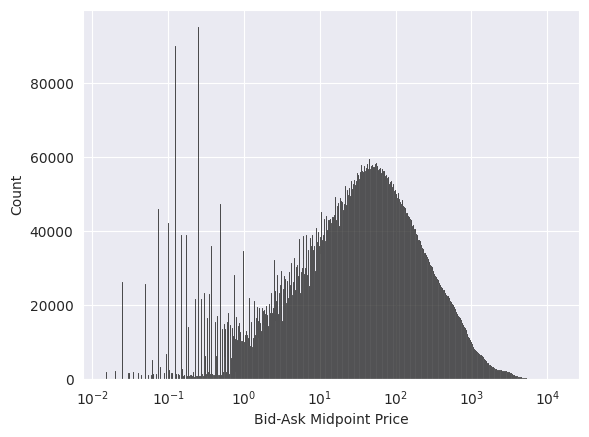

In [34]:
sns.histplot(results['Bid-Ask Midpoint Price'], log_scale=True)

<Axes: xlabel='Strike Price', ylabel='Count'>

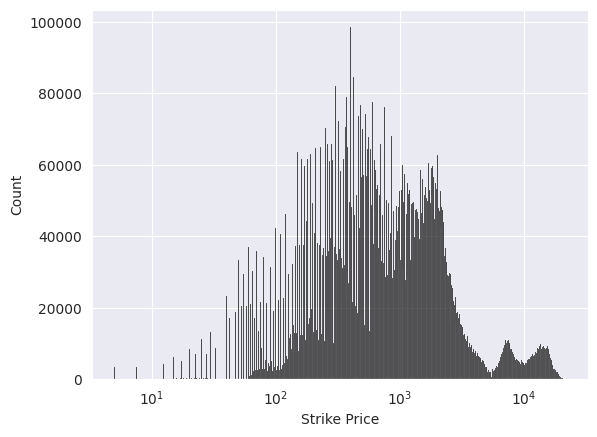

In [35]:
sns.histplot(results['Strike Price'], log_scale=True)

<Axes: xlabel='Implied Volatility', ylabel='Count'>

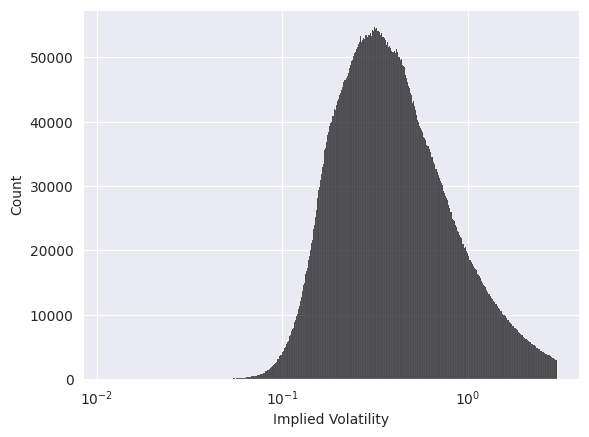

In [36]:
sns.histplot(results['Implied Volatility'], log_scale=True)

<Axes: xlabel='Zero Coupon Rate', ylabel='Count'>

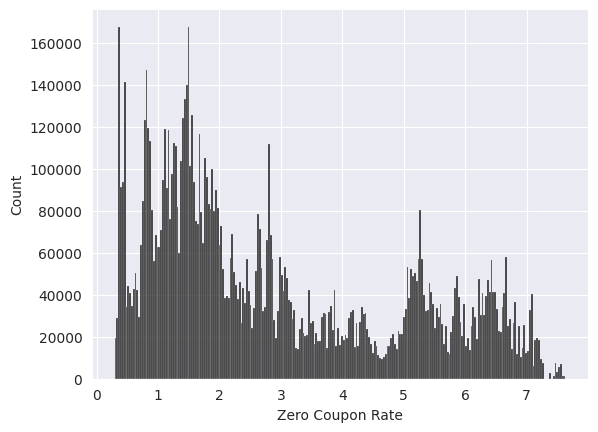

In [37]:
sns.histplot(results['Zero Coupon Rate'])

<Axes: xlabel='Dividend Yield', ylabel='Count'>

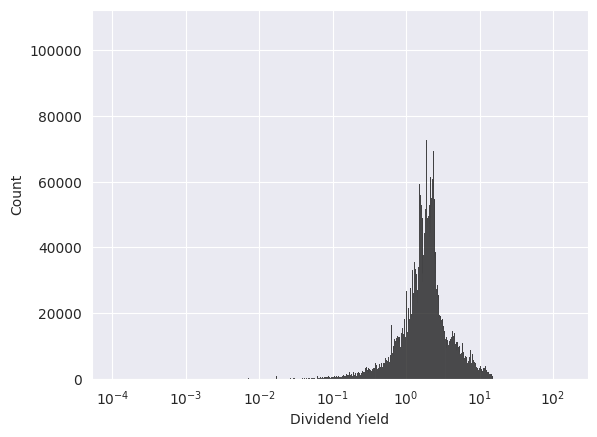

In [38]:
sns.histplot(results['Dividend Yield'], log_scale=True)

<Axes: xlabel='Time to Maturity (years)', ylabel='Count'>

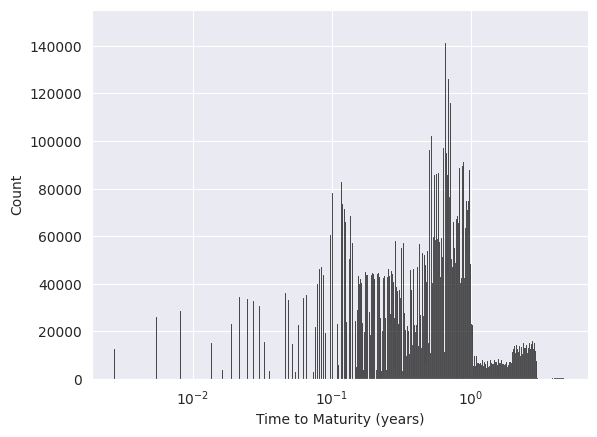

In [39]:
sns.histplot(results['Time to Maturity (years)'], log_scale=True)

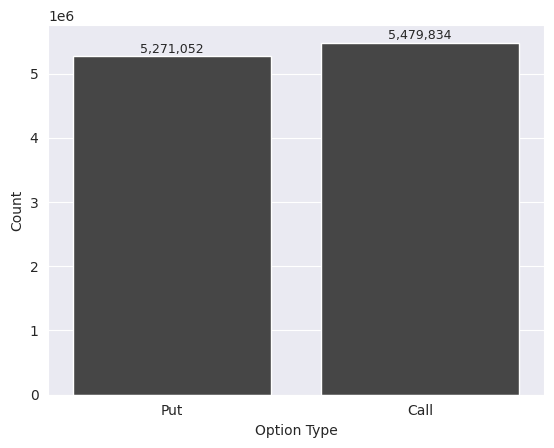

In [40]:
# Revert Option Type to Original Values
results['Option Type'] = results['Option Type'].map({1: 'Call', 0: 'Put'})

# Plot Count of Option Types
ax = sns.countplot(x='Option Type', data=results, color='#464646')

for p in ax.patches:
    ax.annotate("{:,d}".format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=9)

ax.set_ylabel('Count')
plt.show()